# Starter code for Autoencoders
In this notebook, we will prepare Autism Brain Imaging Data Exchange (ABIDE) dataset to use autoencoders. This tutorial shows the data preprocessing that has been done on ABIDE dataset.       
Outcome of this notebook, is a ready to train dataset

## Outline of ABIDE data preprocessing
1. Loading the data. ABIDE complete 2017 xlsx file:   
    Has 1098 observations and 2144 Features/columns
    
2. Explore data types
  *   Categorical
  *   Numerical 
  *   Date 
  *   Boolean
 
  Filter categorical variables. For example, remove columns that have one or number of unique values that equal number of observations of data from the categorical column list. 
  
4. Exploratory Data Analysis: Visualize distribution of some of the columns

3. Treat Missing values

  *   Number of missing values in . Numerical data: 10436
  *   Number of missing values in Categorical data: 474 
  *   Number of missing values in Boolean:   0
  
  Different Methods: 

  *   Fill median, Mode, Mean , Count (case of categorical variables)
  *  Advanced Methods (Not covered in this tutorial)
    - Linear Regression
    - K-Nearest Neighbour
    
5. We provide users with choice to choose from different methods of encoding categorical methods available in scikit learn
6.  Standardization of data for Autoencoders setup
7. Useful links to code and data

[Medium Aritcle](https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87)










In [1]:
## Code to install necessary libraries and perform authorization

"""
When you run this code, you will be asked to authorize which can be done by clicking the click outputed and entering your google credentials
"""

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpf1mmpqqb/pubring.gpg' created
gpg: /tmp/tmpf1mmpqqb/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [0]:
## mounting the drive
!mkdir -p drive 
!google-drive-ocamlfuse drive

In [0]:
import pandas as pd
import numpy as np

## Installing library 'xlrd' that is required to load 'xlsx' file
!pip install xlrd

## Category encoders library
!pip install category_encoders

In [4]:
# Loading the file

"""
Here while loading the data, we are setting the directory where the file 'xlsx' is. 
In this case, "drive/ABIDE_Data_preprocessing"
"""
data = pd.read_excel('drive/ABIDE_Data_preprocessing/ABIDE_Complete_2017.xlsx', index_col=0)

In [5]:
## Examine our data
data.head()

,subjectIdentifier,Index.1,Data,Metadata,projectIdentifier,projectDescription,Data.1,researchGroup,subjectSex,Dx_Category,...,gaus_curv_rh_V1,fold_ind_rh_V1,curv_ind_rh_V1,surf_area_rh_V2,thick_avg_rh_V2,thick_std_rh_V2,mean_curv_rh_V2,gaus_curv_rh_V2,fold_ind_rh_V2,curv_ind_rh_V2
Index,,,,,,,,,,,,,,,,,,,,,
1,50002,252,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,328631-82022,Autism,M,Autism,...,0.063,82.0,11.2,6587.0,2.127,0.588,0.160,0.063,168.0,25.2
2,50003,784,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,328410-82022,Autism,M,Autism,...,0.098,90.0,15.9,5340.0,2.167,0.652,0.171,0.082,375.0,29.5
3,50004,1004,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,328736-82022,Autism,M,Autism,...,0.061,67.0,8.3,6155.0,2.158,0.620,0.158,0.058,179.0,24.0
4,50005,787,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,329244-82022,Autism,F,Autism,...,0.061,50.0,7.5,4992.0,1.995,0.648,0.150,0.070,263.0,17.8
5,50006,478,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,329424-82022,Autism,M,Autism,...,0.078,72.0,11.8,5888.0,2.219,0.624,0.164,0.065,168.0,22.0


In [6]:
## Examining data types in the data 
print("Data types distribution in the data: ")
print(50*'-')
data.dtypes.value_counts(normalize=True)*100


Data types distribution in the data: 
--------------------------------------------------


float64           86.567164
int64             12.220149
object             1.119403
bool               0.046642
datetime64[ns]     0.046642
dtype: float64

*We see that, 98% of the data is numerical (float64 & int64). *

In [7]:
print("")
print(50*'-')
print("Number of observations in the data:       ",data.shape[0])
print("Number of features before pre-processing: ",data.shape[1])


--------------------------------------------------
Number of observations in the data:        1098
Number of features before pre-processing:  2144


In [8]:
## To output all the columns without limits
pd.set_option('display.max_columns', None)


## Selecting categorical variable(Object & Boolean) data type
cat_data = data.select_dtypes(include=['object','bool'])
cat_data.head()

,Data,Metadata,projectIdentifier,projectDescription,Data.1,researchGroup,subjectSex,Dx_Category,visitIdentifier,ageQualifier,postMortem,modality,description,Acquisition_Type,Weighting,Coil,Acquisition_Plane,Manufacturer,Mfg_Model,site,handedness,qc_rater_1,qc_rater_4,qc_anat_rater_2,qc_anat_rater_3
Index,,,,,,,,,,,,,,,,,,,,,,,,,
1,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,328631-82022,Autism,M,Autism,Baseline,Y,False,MRI,MP-RAGE,3D,T1,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,Ambi,fail,OK,OK,OK
2,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,328410-82022,Autism,M,Autism,Baseline,Y,False,MRI,MP-RAGE,3D,T1,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,R,OK,OK,OK,OK
3,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,328736-82022,Autism,M,Autism,Baseline,Y,False,MRI,MP-RAGE,3D,T1,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,R,OK,OK,OK,OK
4,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,329244-82022,Autism,F,Autism,Baseline,Y,False,MRI,MP-RAGE,3D,T1,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,R,OK,fail,OK,OK
5,/ifs/pl_cache/cranium/pipeline/2016November01_...,/ifs/pl_cache/cranium/pipeline/2016November01_...,ABIDE,Autism Brain Imaging Data Exchange,329424-82022,Autism,M,Autism,Baseline,Y,False,MRI,MP-RAGE,3D,T1,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,L,OK,OK,OK,OK


In [9]:
print(50*'-')
print("Number of categorical features before pre-processing: ",cat_data.shape[1])

--------------------------------------------------
Number of categorical features before pre-processing:  25


In [10]:
## Unique entries each column

series = cat_data.nunique() 
print("Unique values per categorical column: ")
print(50*'-')
series

Unique values per categorical column: 
--------------------------------------------------


Data                  1098
Metadata              1098
projectIdentifier        1
projectDescription       1
Data.1                1098
researchGroup            2
subjectSex               2
Dx_Category              5
visitIdentifier          1
ageQualifier             1
postMortem               1
modality                 1
description              1
Acquisition_Type         1
Weighting                1
Coil                     8
Acquisition_Plane        4
Manufacturer             4
Mfg_Model               11
site                    20
handedness               6
qc_rater_1               3
qc_rater_4               2
qc_anat_rater_2          3
qc_anat_rater_3          2
dtype: int64

*Dropping categorical columns that have unique values equal to number of observations in the data or just one unique value. These columns would not have predictive capabilities.*

In [11]:
## Dropping columns categorical columns 

series = series[(series != 1098) & (series > 1)]
print("Unique values per categorical column after filtering: ")
print(50*'-')
series

Unique values per categorical column after filtering: 
--------------------------------------------------


researchGroup         2
subjectSex            2
Dx_Category           5
Coil                  8
Acquisition_Plane     4
Manufacturer          4
Mfg_Model            11
site                 20
handedness            6
qc_rater_1            3
qc_rater_4            2
qc_anat_rater_2       3
qc_anat_rater_3       2
dtype: int64

In [12]:
## Categorical data 

cat_data = data.loc[:,series.index]
cat_data.head()



,researchGroup,subjectSex,Dx_Category,Coil,Acquisition_Plane,Manufacturer,Mfg_Model,site,handedness,qc_rater_1,qc_rater_4,qc_anat_rater_2,qc_anat_rater_3
Index,,,,,,,,,,,,,
1,Autism,M,Autism,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,Ambi,fail,OK,OK,OK
2,Autism,M,Autism,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,R,OK,OK,OK,OK
3,Autism,M,Autism,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,R,OK,OK,OK,OK
4,Autism,F,Autism,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,R,OK,fail,OK,OK
5,Autism,M,Autism,HE,Sagittal,Siemens,MAGNETOM Allegra syngo MR A30,PITT,L,OK,OK,OK,OK


In [13]:
## Null entires in the object/catergorical column 

print('Number of missing values in the categorical columns: ',cat_data.isnull().sum().sum())

print(50*'-')

print("Missing values per categorical column")
cat_data.isna().sum()



Number of missing values in the categorical columns:  474
--------------------------------------------------
Missing values per categorical column


researchGroup          0
subjectSex             0
Dx_Category            0
Coil                  69
Acquisition_Plane     29
Manufacturer          29
Mfg_Model             29
site                   0
handedness           315
qc_rater_1             0
qc_rater_4             0
qc_anat_rater_2        2
qc_anat_rater_3        1
dtype: int64

In [14]:
""" 
Function that maps an entry in a column to new value. 
column_name: Name of the column
value_to_replace: Old entry in the column to be replaced
new_value: New value to replace old value 
"""

def replace_value_in_column(column_name,value_to_replace ='',new_value='', check_unique =True):

    if check_unique == True:
      print(cat_data[column_name].value_counts(normalize =True)*100)
    else :
      print(cat_data[column_name].value_counts(normalize =True)*100)
      cat_data[column_name].replace(value_to_replace,new_value,inplace=True)
      print("")
      print("After removing white space in the column entry: " + value_to_replace)
      print(50*'-')
      print(cat_data[column_name].value_counts(normalize =True)*100)

In [15]:
## Striping white space in column "COIL"
replace_value_in_column('Coil','HEA; HEP','HEA;HEP', check_unique=False)

HE                26.919339
HEA;HEP           21.379981
SENSE-Head-8      16.326531
Head              13.994169
HEA; HEP           9.620991
HEA;HEP;NE2        5.344995
8HRBRAIN           3.498542
SENSE-Head-32P     2.915452
Name: Coil, dtype: float64

After removing white space in the column entry: HEA; HEP
--------------------------------------------------
HEA;HEP           31.000972
HE                26.919339
SENSE-Head-8      16.326531
Head              13.994169
HEA;HEP;NE2        5.344995
8HRBRAIN           3.498542
SENSE-Head-32P     2.915452
Name: Coil, dtype: float64


Distribution of categories in each of the categorical column
Number of categorical features:  13




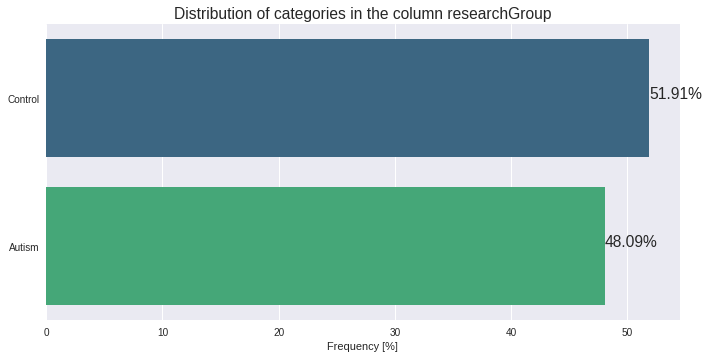

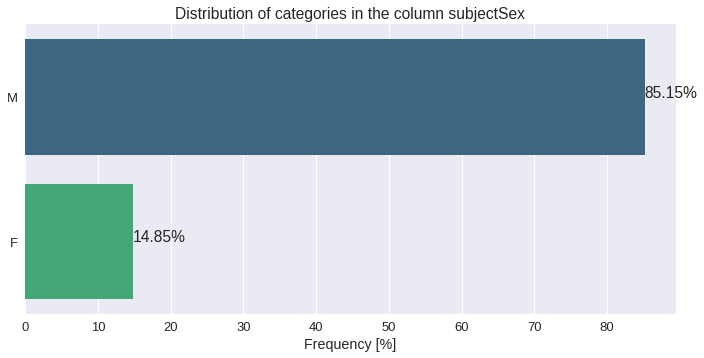

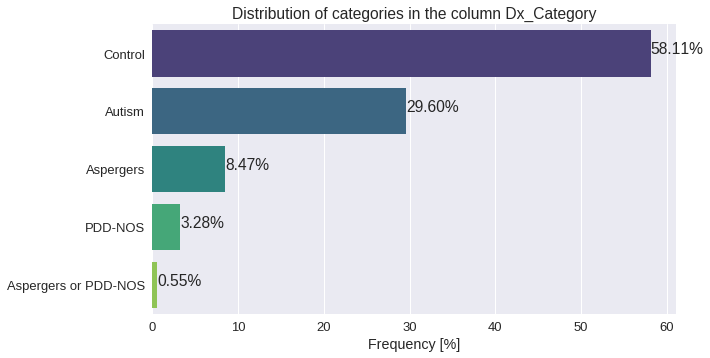

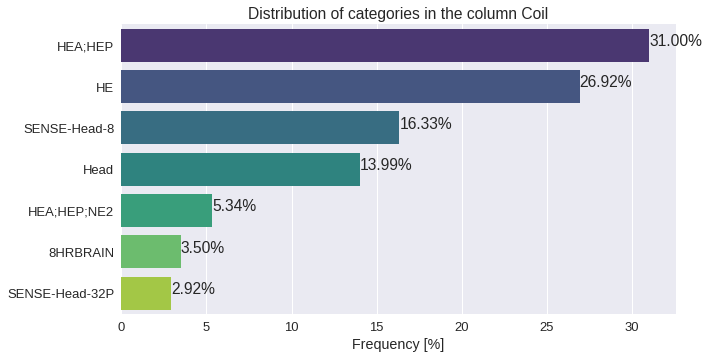

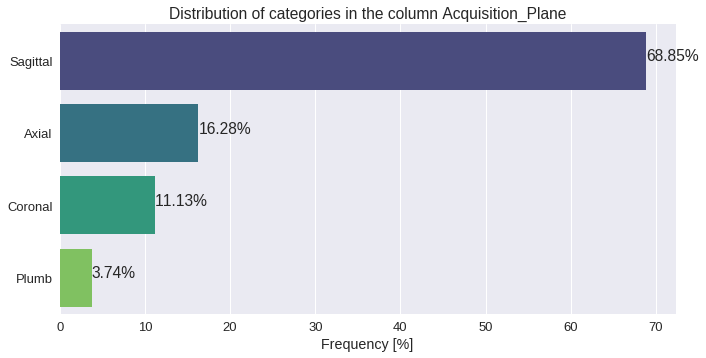

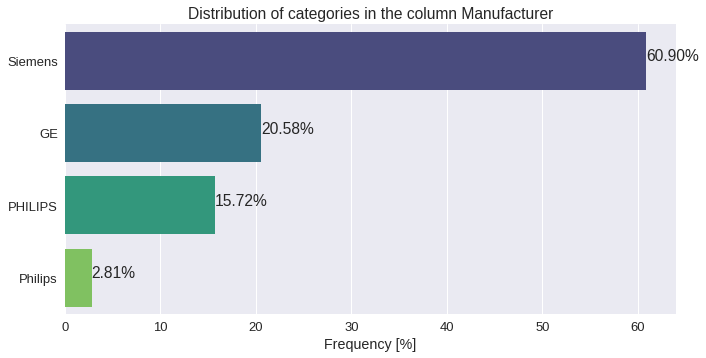

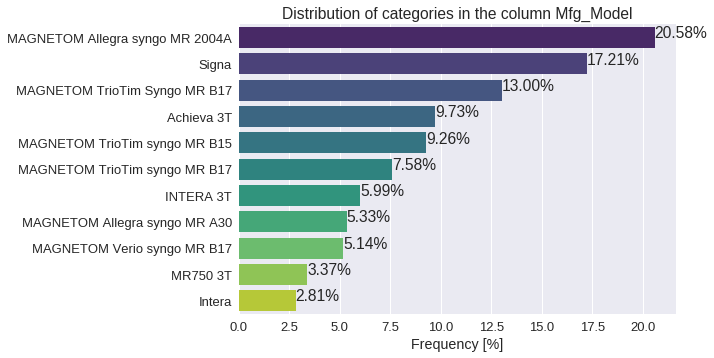

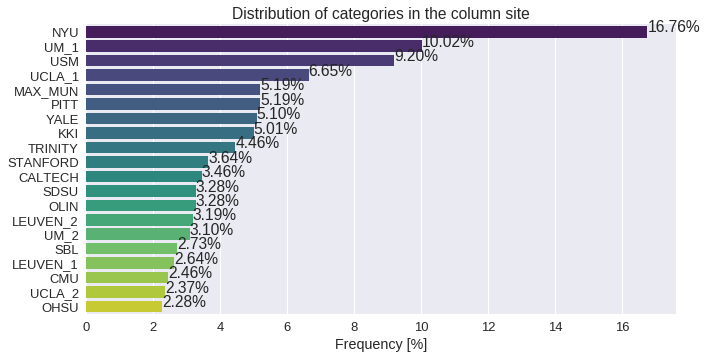

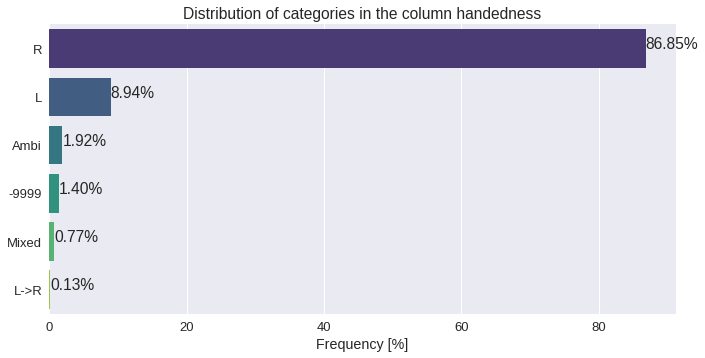

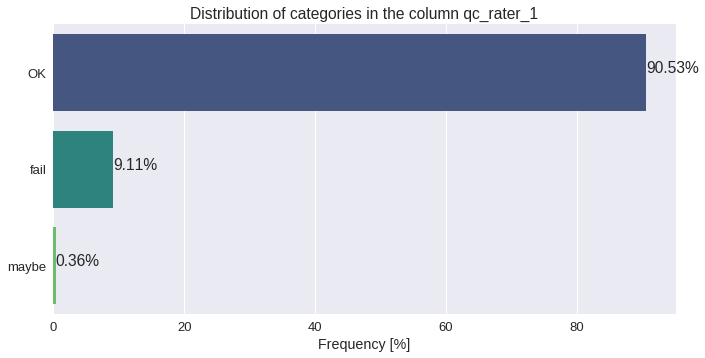

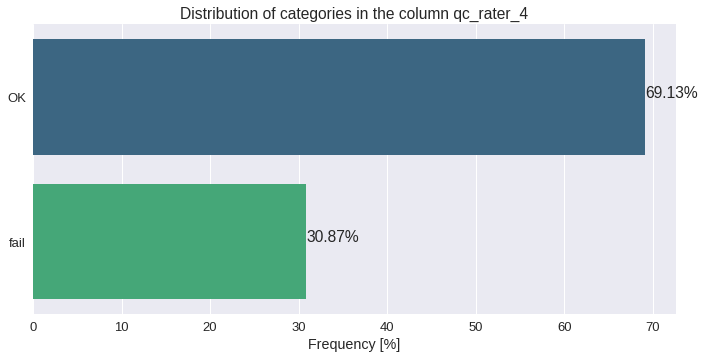

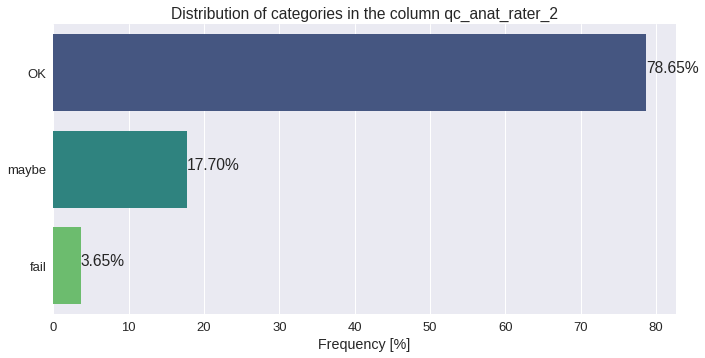

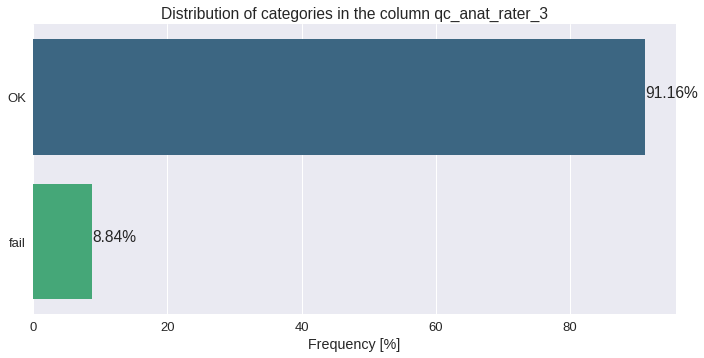

In [16]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Distribution of categories in each of the categorical column")
print("Number of categorical features: ",cat_data.shape[1])
print('')
for i in cat_data.columns:

  to_plot = cat_data[i].value_counts(normalize =True)*100
  print('')
  try:
    ax = sns.barplot(y = to_plot.index,x=to_plot ,palette="viridis")
  except RuntimeError:
    pass
    
  
  sns.set(font_scale=1.3)
  ax.set_xlabel(' ')
  ax.set_ylabel(' ')
  fig = plt.gcf()
  fig.set_size_inches(10,5)
  ax.set_xlim()
  for p in ax.patches:
      ax.annotate('{:.2f}%'.format(100*p.get_width()/100),(p.get_width(), p.get_y()+0.4))
  
  plt.tight_layout()
  plt.title('Distribution of categories in the column ' + i)
  plt.ylabel('')
  plt.xlabel('Frequency [%]')
  plt.show()
  print(100*'=')

## Now deaing with numerical columns

In [17]:
Num_data = data.select_dtypes(include=['float64','int64'])
print("Number of Numerical features before pre-processing: ",Num_data.shape[1])

Number of Numerical features before pre-processing:  2118


In [18]:
## Checking for Null values

to_sort = (Num_data.isnull().sum()/10.98)
to_sort.sort_values(ascending=False, inplace=True)
print("Percentage of null values in the numerical columns: ", 
      Num_data.isnull().sum().sum()*100/(Num_data.shape[0]*Num_data.shape[1]))

print(100*'-')
print('')
print("Percentage of null values per numerical column: ")
print(50*'-')
to_sort

Percentage of null values in the numerical columns:  0.4487513566601478
----------------------------------------------------------------------------------------------------

Percentage of null values per numerical column: 
--------------------------------------------------


volume_Right-non-WM-hypointensities      100.000000
volume_Right-WM-hypointensities          100.000000
volume_Left-WM-hypointensities           100.000000
volume_Left-non-WM-hypointensities       100.000000
volume_5th-Ventricle                      56.010929
Slice_Thickness                            6.284153
fold_ind_ctx_rh_Lat_Fis-ant-Vertical       4.007286
fold_ind_ctx_lh_G_subcallosal              3.916211
iq                                         3.187614
curv_ind_ctx_lh_G_subcallosal              2.914390
fold_ind_ctx_rh_G_subcallosal              2.914390
Field_Strength                             2.641166
Flip_Angle                                 2.641166
TR                                         2.641166
TE                                         2.641166
curv_ind_ctx_rh_G_subcallosal              2.185792
fold_ind_ctx_lh_Lat_Fis-ant-Vertical       2.003643
curv_ind_ctx_rh_Lat_Fis-ant-Vertical       2.003643
volume_Right-vessel                        1.730419
fold_ind_ctx

We see that columns "volume_Right-non-WM-hypointensities " , "volume_Right-WM-hypointensities", "volume_Left-WM-hypointensities ", "volume_Left-non-WM-hypointensities"  have all 'NaN' values we will drop them. Further we see that null values per column are relatively less expect for "volume_5th-Ventricle: 56%", "Slice_Thickness: 6%".

We will explore the data distribution of these columns and figure out the way to treat those missing values


In [19]:
## Droping all NaN rows
Num_data = Num_data.dropna(axis = 1, how='all')

to_sort = (Num_data.isnull().sum()/10.98)
to_sort.sort_values(ascending=False, inplace=True)
to_sort

volume_5th-Ventricle                     56.010929
Slice_Thickness                           6.284153
fold_ind_ctx_rh_Lat_Fis-ant-Vertical      4.007286
fold_ind_ctx_lh_G_subcallosal             3.916211
iq                                        3.187614
curv_ind_ctx_lh_G_subcallosal             2.914390
fold_ind_ctx_rh_G_subcallosal             2.914390
Field_Strength                            2.641166
TR                                        2.641166
TE                                        2.641166
Flip_Angle                                2.641166
curv_ind_ctx_rh_G_subcallosal             2.185792
fold_ind_ctx_lh_Lat_Fis-ant-Vertical      2.003643
curv_ind_ctx_rh_Lat_Fis-ant-Vertical      2.003643
volume_Right-vessel                       1.730419
fold_ind_ctx_rh_S_suborbital              1.457195
fold_ind_ctx_lh_S_interm_prim-Jensen      1.275046
curv_ind_ctx_rh_S_suborbital              1.092896
volume_Left-vessel                        1.001821
fold_ind_ctx_lh_S_temporal_tran

count    483.000000
mean       9.415942
std       10.285304
min        1.000000
25%        2.000000
50%        6.000000
75%       12.000000
max       79.000000
Name: volume_5th-Ventricle, dtype: float64
----------------------------------------------------------------------------------------------------


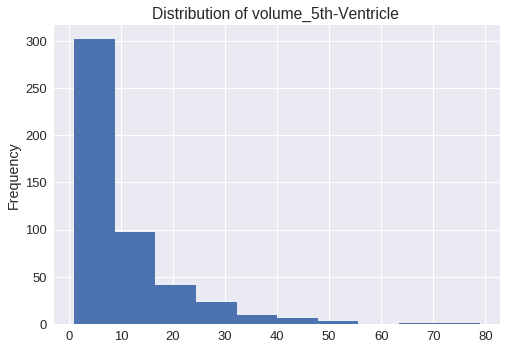

In [20]:
print(Num_data["volume_5th-Ventricle"].describe())
print(100*'-')
Num_data["volume_5th-Ventricle"].plot(kind='hist')
plt.title("Distribution of volume_5th-Ventricle ")
plt.show()

count    1029.000000
mean        1.131069
std         0.126740
min         1.000000
25%         1.000000
50%         1.200000
75%         1.200000
max         1.330000
Name: Slice_Thickness, dtype: float64
----------------------------------------------------------------------------------------------------


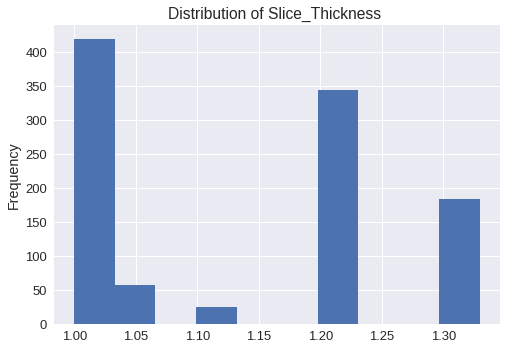

In [21]:
print(Num_data["Slice_Thickness"].describe())
print(100*'-')
Num_data["Slice_Thickness"].plot(kind='hist')
plt.title("Distribution of Slice_Thickness ")
plt.show()

In [22]:
## Changing the columns names to pythonic naming convention
col_list = []
for x in Num_data.columns:
  x = x.replace("-","_")
  col_list.append(x)

Num_data.columns = col_list

## Finding if their exists a numerical column in the data set where all the values in the column are equal

print("Numerical columns with only one value through out the column")
for i in Num_data.columns:
  if len(Num_data[i].value_counts()) == 1 :
    print(i)

Numerical columns with only one value through out the column
weightKg
Flip_Angle
Field_Strength


In [23]:
## Drop numerical columns that are not useful for prediciton
"""
These include: 
1. columns with only one value through out the column
2. ID, subject index etc
"""

Num_data.drop(['weightKg','Flip_Angle','Field_Strength','subjectIdentifier',
               'Index.1','seriesIdentifier','imageUID'],axis =1, inplace = True)



####  Filling the missing values in numerical columns with median of the column

We choose this metric based on the visualizations above. we see the data in heavily right 
skewed with 75% all less than 12. The standard deviation also seems to be on a higher scale. 
We have two simple imputation methods to fill the missing values
1. Median
2. Mean

In this case, it is hard to state that one imputation method at all times would give us best results. 
Thus, we choose one method. Let's take median and continue with out data preprocessing




In [24]:
#@title Treating Missing Values
Imput_method = "Median" #@param ["Median", "Mean"]


## Creating a empty data frame to fill the median 

num_data = pd.DataFrame()
for column in Num_data.columns:
  if Imput_method == "Median":
    num_data[column] = Num_data[column].fillna(Num_data[column].median())
  elif Imput_method == "Mean":
    num_data[column] = Num_data[column].fillna(Num_data[column].mean())

print('Missing values are filled using '+Imput_method + " method")
print("Sum of missing values in the numerical column:",
      num_data.isnull().sum().sum())

Missing values are filled using Median method
Sum of missing values in the numerical column: 0


In [25]:
num_data.head()

subjectAge  Slice_Thickness    TE      TR  Interslice_Spacing  \
Index                                                                  
1           16.77             1.05  3.93  2100.0             1.05078   
2           24.45             1.05  3.93  2100.0             1.05078   
3           19.09             1.05  3.93  2100.0             1.05078   
4           13.73             1.05  3.93  2100.0             1.05078   
5           13.37             1.05  3.93  2100.0             1.05078   

       Matrix_X  Matrix_Y  Matrix_Z  Pixel_Spacing_X  Pixel_Spacing_Y  \
Index                                                                   
1           176       256       256             1.05          1.05078   
2           176       256       256             1.05          1.05078   
3           176       256       256             1.05          1.05078   
4           176       256       256             1.05          1.05078   
5           176       256       256             1.05          1.05078   

       Background  L_superior_frontal_gyrus  R_superior_frontal_gyrus  \
Index                                                                   
1      12143984.0                   61410.7                   62160.8   
2      12193179.0                   58855.5                   58943.6   
3      12186429.0                   55168.8                   56424.3   
4      12281697.0                   59930.2                   60800.9   
5      12245202.0                   63291.1                   65074.2   

       L_middle_frontal_gyrus  R_middle_frontal_gyrus  \
Index                                                   
1                     76506.6                 68584.7   
2                     63628.5                 60680.3   
3                     66318.2                 59982.4   
4                     58303.6                 61404.9   
5                     68013.2                 67606.2   

       L_inferior_frontal_gyrus  R_inferior_frontal_gyrus  L_precentral_gyrus  \
Index                                                                           
1                       22551.6                   31367.3             33952.7   
2                       18481.2                   29026.6             27194.8   
3                       23459.4                   32595.1             28327.5   
4                       16578.7                   27060.3             23248.4   
5                       20364.0                   31242.1             24951.5   

       R_precentral_gyrus  L_middle_orbitofrontal_gyrus  \
Index                                                     
1                 32217.1                       10415.6   
2                 28069.0                       11190.0   
3                 29922.8                       12071.1   
4                 23627.5                        8386.7   
5                 22149.3                       12047.9   

       R_middle_orbitofrontal_gyrus  L_lateral_orbitofrontal_gyrus  \
Index                                                                
1                           10742.5                         5263.4   
2                           10326.3                         5692.4   
3                           11215.5                         7068.5   
4                            9837.1                         4457.7   
5                           12453.7                         5184.6   

       R_lateral_orbitofrontal_gyrus  L_gyrus_rectus  R_gyrus_rectus  \
Index                                                                  
1                             4795.1          2374.3          3104.7   
2                             4182.9          1816.7          3101.3   
3                             5359.7          1608.0          3139.5   
4                             4819.4          1598.7          3981.2   
5                             4938.8          2152.9          3525.6   

       L_postcentral_gyrus  R_postcentral_gyrus  L_superior_parietal_gyrus  \
Index                 

In [26]:
## Creating Dummies
## Changing the columns names to pythonic naming convention
col_list = []
for x in cat_data.columns:
  x = x.replace("-","_")
  col_list.append(x)

cat_data.columns = col_list

#cat_data = pd.get_dummies(cat_data,drop_first=True)
#cat_data.head()

In [27]:
#@title Choosing categorical encoders

Encoding_method = "Polynomial Encoder" #@param ["One Hot Encoding", "Binary Encoding", "Hashing Encoder", "Polynomial Encoder", "Ordinal Encoder"]


import category_encoders as ce

if Encoding_method == "One Hot Encoding":
  encoder = ce.OneHotEncoder()
  encod_cat_data = encoder.fit_transform(cat_data)
elif Encoding_method == "Binary Encoding":
  encoder = ce.PolynomialEncoder()
  encod_cat_data = encoder.fit_transform(cat_data)
elif Encoding_method == "Hashing Encoder":
  encoder = ce.HashingEncoder()
  encod_cat_data = encoder.fit_transform(cat_data)
elif Encoding_method == "Polynomial Encoder":
  encoder = ce.PolynomialEncoder()
  encod_cat_data = encoder.fit_transform(cat_data)
else:
  encoder = ce.OrdinalEncoder()
  encod_cat_data = encoder.fit_transform(cat_data)

print("Encoding method used: " + Encoding_method)

print("see the categorical data after "+ Encoding_method)
print(100*'-')
encod_cat_data.head()
  


Encoding method used: Polynomial Encoder
see the categorical data after Polynomial Encoder
----------------------------------------------------------------------------------------------------


,col_researchGroup_0,col_researchGroup_1,col_subjectSex_0,col_subjectSex_1,col_Dx_Category_0,col_Dx_Category_1,col_Dx_Category_2,col_Dx_Category_3,col_Dx_Category_4,col_Coil_0,col_Coil_1,col_Coil_2,col_Coil_3,col_Coil_4,col_Coil_5,col_Coil_6,col_Coil_7,col_Acquisition_Plane_0,col_Acquisition_Plane_1,col_Acquisition_Plane_2,col_Acquisition_Plane_3,col_Acquisition_Plane_4,col_Manufacturer_0,col_Manufacturer_1,col_Manufacturer_2,col_Manufacturer_3,col_Manufacturer_4,col_Mfg_Model_0,col_Mfg_Model_1,col_Mfg_Model_2,col_Mfg_Model_3,col_Mfg_Model_4,col_Mfg_Model_5,col_Mfg_Model_6,col_Mfg_Model_7,col_Mfg_Model_8,col_Mfg_Model_9,col_Mfg_Model_10,col_Mfg_Model_11,col_site_0,col_site_1,col_site_2,col_site_3,col_site_4,col_site_5,col_site_6,col_site_7,col_site_8,col_site_9,col_site_10,col_site_11,col_site_12,col_site_13,col_site_14,col_site_15,col_site_16,col_site_17,col_site_18,col_site_19,col_handedness_0,col_handedness_1,col_handedness_2,col_handedness_3,col_handedness_4,col_handedness_5,col_handedness_6,col_qc_rater_1_0,col_qc_rater_1_1,col_qc_rater_1_2,col_qc_rater_4_0,col_qc_rater_4_1,col_qc_anat_rater_2_0,col_qc_anat_rater_2_1,col_qc_anat_rater_2_2,col_qc_anat_rater_2_3,col_qc_anat_rater_3_0,col_qc_anat_rater_3_1,col_qc_anat_rater_3_2
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,-0.707107,1.0,-0.707107,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.540062,0.540062,-0.43082,0.282038,-0.149786,0.061546,-0.01707,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.459933,0.501828,-0.459933,0.368767,-0.261608,0.164197,-0.090479,0.043077,-0.017213,0.005456,-0.001191,1.0,-0.368394,0.430192,-0.437609,0.405148,-0.346948,0.276768,-0.206291,0.143771,-0.09361,0.056819,-0.03204,0.016702,-0.007994,0.00348,-0.00136,0.000468,-0.000137,0.000032,-0.000005,1.0,-0.566947,0.545545,-0.408248,0.241747,-0.109109,0.032898,1.0,-7.071068e-01,0.408248,1.0,-0.707107,1.0,-0.67082,0.5,-0.223607,1.0,-0.707107,0.408248
2,1.0,-0.707107,1.0,-0.707107,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.540062,0.540062,-0.43082,0.282038,-0.149786,0.061546,-0.01707,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.459933,0.501828,-0.459933,0.368767,-0.261608,0.164197,-0.090479,0.043077,-0.017213,0.005456,-0.001191,1.0,-0.368394,0.430192,-0.437609,0.405148,-0.346948,0.276768,-0.206291,0.143771,-0.09361,0.056819,-0.03204,0.016702,-0.007994,0.00348,-0.00136,0.000468,-0.000137,0.000032,-0.000005,1.0,-0.377964,0.000000,0.408248,-0.564076,0.436436,-0.197386,1.0,-5.551115e-17,-0.816497,1.0,-0.707107,1.0,-0.67082,0.5,-0.223607,1.0,-0.707107,0.408248
3,1.0,-0.707107,1.0,-0.707107,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.540062,0.540062,-0.43082,0.282038,-0.149786,0.061546,-0.01707,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.459933,0.501828,-0.459933,0.368767,-0.261608,0.164197,-0.090479,0.043077,-0.017213,0.005456,-0.001191,1.0,-0.368394,0.430192,-0.437609,0.405148,-0.346948,0.276768,-0.206291,0.143771,-0.09361,0.056819,-0.03204,0.016702,-0.007994,0.00348,-0.00136,0.000468,-0.000137,0.000032,-0.000005,1.0,-0.377964,0.000000,0.408248,-0.564076,0.436436,-0.197386,1.0,-5.551115e-17,-0.816497,1.0,-0.707107,1.0,-0.67082,0.5,-0.223607,1.0,-0.707107,0.408248
4,1.0,-0.707107,1.0,0.707107,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.540062,0.540062,-0.43082,0.282038,-0.149786,0.061546,-0.01707,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.632456,0.534522,-0.316228,0.119523,1.0,-0.459933,0.501828,-0.459933,0.368767,-0.261608,0.164197,-0.090479,0.043077,-0.017213,0.005456,-0.001191,1.0,-0.368394,0.430192,-0.437609,0.405148,-0.346948,0.276768,-0.206291,0.143771,-0.09361,0.056819,-0.03204,0.016702,-0.007994,0.00348,-0.00136,0.000468,-0.000137,0.000032,-0.000005,1.0,-0.377964,0.000000,0.408248,-0.564076,0.436436,-0.197386,1.0,-5.551115e-17,-0.816497,1.0,0.707107,1.0,-0.67082,0.5,-0.223607,1.0,-0.707107,0.4082

In [28]:
## Final number of features
print("Number of features in numerical column after data pre-processing: " ,num_data.shape[1])
print("Number of features in categorical columns after data pre-processing: " ,encod_cat_data.shape[1])
print(100*'-')
print("Total features after pre-processing: ", num_data.shape[1]+encod_cat_data.shape[1])

Number of features in numerical column after data pre-processing:  2107
Number of features in categorical columns after data pre-processing:  78
----------------------------------------------------------------------------------------------------
Total features after pre-processing:  2185


In [29]:
## Normalize input numerical data 

print("Without normalization, statisitcs of two features/column in the data set" )
print(100*'-')

num_data[['Slice_Thickness','L_superior_frontal_gyrus']].describe()



Without normalization, statisitcs of two features/column in the data set
----------------------------------------------------------------------------------------------------


,Slice_Thickness,L_superior_frontal_gyrus
count,1098.000000,1098.000000
mean,1.135401,54460.777049
std,0.123826,12537.475581
min,1.000000,0.000000
25%,1.000000,49939.125000
50%,1.200000,55863.800000
75%,1.200000,61487.250000
max,1.330000,105171.600000


We see that there is huge difference in statistics of these features. Because of which neural networks gradients can explode or decrease so much that it results in what is termed as "vansihing gradient problem" . Practise of normalizing is common before training a machine learning model.

In [30]:
import numpy as np
norm_num_data = num_data.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

print("After normalization, statisitcs of two features/column in the data set" )
print(100*'-')

norm_num_data[['Slice_Thickness','L_superior_frontal_gyrus']].describe()

After normalization, statisitcs of two features/column in the data set
----------------------------------------------------------------------------------------------------


,Slice_Thickness,L_superior_frontal_gyrus
count,1.098000e+03,1.098000e+03
mean,7.765494e-17,-3.720966e-17
std,3.752293e-01,1.192097e-01
min,-4.103052e-01,-5.178278e-01
25%,-4.103052e-01,-4.299309e-02
50%,1.957554e-01,1.334032e-02
75%,1.957554e-01,6.680960e-02
max,5.896948e-01,4.821722e-01


In [31]:
## Concatenating the categorical and Numerical datasets to one data set 

train_data = pd.concat([norm_num_data,encod_cat_data], axis=1)

## Checking the dimension of the data
print("Dimensions after data preprocessing: \n",train_data.shape)

train_data.reset_index(drop=True).head()

Dimensions after data preprocessing: 
 (1098, 2185)


subjectAge  Slice_Thickness        TE        TR  Interslice_Spacing  \
0   -0.005734         -0.25879  0.303986 -0.219811            0.075995   
1    0.127761         -0.25879  0.303986 -0.219811            0.075995   
2    0.034592         -0.25879  0.303986 -0.219811            0.075995   
3   -0.058576         -0.25879  0.303986 -0.219811            0.075995   
4   -0.064834         -0.25879  0.303986 -0.219811            0.075995   

   Matrix_X  Matrix_Y  Matrix_Z  Pixel_Spacing_X  Pixel_Spacing_Y  Background  \
0 -0.056035  -0.01564  0.000124        -0.090644         0.062815    0.215966   
1 -0.056035  -0.01564  0.000124        -0.090644         0.062815    0.221129   
2 -0.056035  -0.01564  0.000124        -0.090644         0.062815    0.220421   
3 -0.056035  -0.01564  0.000124        -0.090644         0.062815    0.230418   
4 -0.056035  -0.01564  0.000124        -0.090644         0.062815    0.226588   

   L_superior_frontal_gyrus  R_superior_frontal_gyrus  L_middle_frontal_gyrus  \
0                  0.066082                  0.066961                0.245423   
1                  0.041786                  0.036686                0.097974   
2                  0.006732                  0.012978                0.128770   
3                  0.052005                  0.054164                0.037006   
4                  0.083961                  0.094378                0.148177   

   R_middle_frontal_gyrus  L_inferior_frontal_gyrus  R_inferior_frontal_gyrus  \
0                0.122657                  0.113916                  0.079190   
1                0.054279                  0.011199                  0.051865   
2                0.048242                  0.136824                  0.093523   
3                0.060548                 -0.036810                  0.028911   
4                0.114193                  0.058712                  0.077729   

   L_precentral_gyrus  R_precentral_gyrus  L_middle_orbitofrontal_gyrus  \
0            0.313241            0.315208                      0.049709   
1            0.137675            0.201462                      0.083791   
2            0.167102            0.252296                      0.122568   
3            0.035149            0.079670                     -0.039583   
4            0.079395            0.039136                      0.121547   

   R_middle_orbitofrontal_gyrus  L_lateral_orbitofrontal_gyrus  \
0                      0.030072                       0.036643   
1                      0.019217                       0.063181   
2                      0.042408                       0.148308   
3                      0.006459                      -0.013199   
4                      0.074700                       0.031768   

   R_lateral_orbitofrontal_gyrus  L_gyrus_rectus  R_gyrus_rectus  \
0                       0.076083        0.104801        0.099570   
1                      -0.001984        0.024645        0.099121   
2                       0.148080       -0.005356        0.104159   
3                       0.079182       -0.006693        0.215160   
4                       0.094407        0.072974        0.155077   

   L_postcentral_gyrus  R_postcentral_gyrus  L_superior_parietal_gyrus  \
0             0.150983             0.120119                   0.075268   
1             0.136936             0.157485                   0.105612   
2             0.118901             0.138974                   0.152080   
3             0.008770             0.119461                  -0.061121   
4             0.028562            -0.000723                   0.067305   

   R_superior_parietal_gyrus  L_supramarginal_gyrus  R_supramarginal_gyrus  \
0                   0.018067               0.087165               0.111186   
1                   0.046232               0.070327               0.164575   
2                   0.132193               0.040576               0.269683   
3                  -0.025251               0.003781               0.062036   
4    

Now that you have the ABIDE data preprocessed, you can continue to train autoencoder model as explained in the article  

Happy Learning!